In [2]:
# The Impact of Kernel Size and Stride on Convolutional Neural Networks

### Objectives:
 ##Understand the theoretical role of kernel size and stride in CNNs.
 #Experiment with different configurations using the MNIST dataset.
 #Evaluate how these parameters affect performance and computational efficiency.
# Visualize feature maps to analyze the impact on feature extraction.


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Data preparation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)





In [15]:
# Train the model for 5 epochs
class CNNModel(nn.Module):
    def __init__(self, kernel_size, stride, input_size=28):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=kernel_size, stride=stride)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=kernel_size, stride=stride)

        # Calculate flattened size dynamically
        self.flattened_size = self._get_flattened_size(input_size, kernel_size, stride)

        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 10)

    def _get_flattened_size(self, input_size, kernel_size, stride):
        # Helper to calculate the size of the flattened feature maps
        conv1_output_size = (input_size - kernel_size) // stride + 1
        conv2_output_size = (conv1_output_size - kernel_size) // stride + 1
        return 64 * (conv2_output_size ** 2)  # 64 channels output from conv2

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        return self.fc2(x)



In [16]:
# Define the model
model = CNNModel(kernel_size=3, stride=1)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=5)


Epoch 1, Loss: 0.13952544453302657
Epoch 2, Loss: 0.03951959960180139
Epoch 3, Loss: 0.022880990807684874
Epoch 4, Loss: 0.014423201718616292
Epoch 5, Loss: 0.011135456442590792
Finished Training


In [17]:
# Get a batch of images from the test_loader
images, labels = next(iter(test_loader))

# Extract a single image (e.g., the first one in the batch)
single_image = images[0]  # Shape: [1, 28, 28]


In [18]:
def visualize_filters(model, image):
    model.eval()
    with torch.no_grad():
        feature_maps = model.conv1(image.unsqueeze(0))
    fig, axes = plt.subplots(1, feature_maps.size(1), figsize=(12, 4))
    for i, ax in enumerate(axes):
        ax.imshow(feature_maps[0, i].cpu().numpy(), cmap='gray')
        ax.axis('off')
    plt.show()


In [20]:
## Visualizing Feature Maps

#  We visualize the output of the first convolutional layer to understand how kernels extract features.


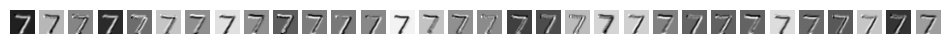

In [19]:
# Visualize feature maps from the first convolutional layer
visualize_filters(model, single_image)
